# Original Code

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df.drop(['EIN', 'NAME'], axis=1, inplace=True)

In [3]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [4]:
# Look at APPLICATION_TYPE value counts for binning
app_df = application_df['APPLICATION_TYPE'].value_counts()
app_df

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T14        3
T25        3
T15        2
T29        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

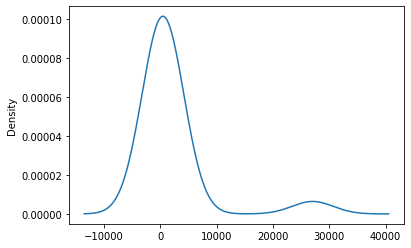

In [5]:
# Visualize the value counts of APPLICATION_TYPE
app_df.plot.density()

In [6]:
# Determine which values to replace if counts are less than ...?
replace_application = list(app_df[app_df < 500].index)

# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [7]:
# Look at CLASSIFICATION value counts for binning
class_df = application_df['CLASSIFICATION'].value_counts()
class_df.head(10)

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
Name: CLASSIFICATION, dtype: int64

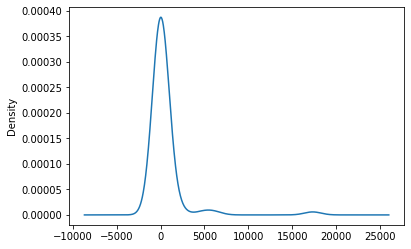

In [8]:
# Visualize the value counts of CLASSIFICATION
class_df.plot.density()

In [9]:
# Determine which values to replace if counts are less than ..?
replace_class = list(class_df[class_df < 1000].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [10]:
# Generate our categorical variable lists
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()
application_cat

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS']

In [11]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

C:\Users\nick\Anaconda3\envs\PythonData\envs\mlenv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [12]:
# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df, left_index=True,right_index=True)
application_df = application_df.drop(columns = application_cat)
application_df.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [13]:
# Split our preprocessed data into our features and target arrays
y = application_df['IS_SUCCESSFUL'].values
X = application_df.drop(['IS_SUCCESSFUL'],1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [14]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [15]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
input_features = len(X_train_scaled[0])
nodes_layer1 = 80
nodes_layer2 = 30

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=nodes_layer1, activation="relu", input_dim=input_features))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 80)                3520      
                                                                 
 dense_1 (Dense)             (None, 30)                2430      
                                                                 
 dense_2 (Dense)             (None, 1)                 31        
                                                                 
Total params: 5,981
Trainable params: 5,981
Non-trainable params: 0
_________________________________________________________________


In [16]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [17]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq='epoch',
    period=10)
# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=100, callbacks=[cp_callback])

Epoch 1/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5701 - accuracy: 0.7206
Epoch 2/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5551 - accuracy: 0.7273
Epoch 3/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5520 - accuracy: 0.7300
Epoch 4/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5507 - accuracy: 0.7302
Epoch 5/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5495 - accuracy: 0.7318
Epoch 6/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5486 - accuracy: 0.7316
Epoch 7/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5475 - accuracy: 0.7333
Epoch 8/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5472 - accuracy: 0.7334
Epoch 9/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5468 - accuracy: 0.7327
Epoch 10/100
793/804 [============================>.] - ETA: 0s - loss: 0.5460 - accuracy: 

Epoch 71/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5363 - accuracy: 0.7397
Epoch 72/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5364 - accuracy: 0.7397
Epoch 73/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5366 - accuracy: 0.7393
Epoch 74/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5364 - accuracy: 0.7382
Epoch 75/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5364 - accuracy: 0.7397
Epoch 76/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5362 - accuracy: 0.7409
Epoch 77/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5361 - accuracy: 0.7392
Epoch 78/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5360 - accuracy: 0.7390
Epoch 79/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5362 - accuracy: 0.7390
Epoch 80/100
795/804 [============================>.] - ETA: 0s - loss: 0.5358 - a

In [18]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 0.5583 - accuracy: 0.7280 - 539ms/epoch - 2ms/step
Loss: 0.5582544207572937, Accuracy: 0.7280466556549072


# Test 1 - Modify Ask Amount and Remove Variable

In [19]:
#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [20]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df.drop(['EIN', 'NAME', 'ORGANIZATION'], axis=1, inplace=True)

In [21]:
# Look at APPLICATION_TYPE value counts for binning
app_df = application_df['APPLICATION_TYPE'].value_counts()
app_df

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T14        3
T25        3
T15        2
T29        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [22]:
# Determine which values to replace if counts are less than ...?
replace_application = list(app_df[app_df < 500].index)

# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [23]:
# Look at CLASSIFICATION value counts for binning
class_df = application_df['CLASSIFICATION'].value_counts()
class_df.head(10)

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
Name: CLASSIFICATION, dtype: int64

In [24]:
# Determine which values to replace if counts are less than ..?
replace_class = list(class_df[class_df < 1000].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [25]:
# Look at ASK_AMT value counts for binning
ask_df = application_df['ASK_AMT'].value_counts()
ask_df

5000       25398
10478          3
15583          3
6725           3
63981          3
           ...  
772556         1
70103          1
27096          1
25049          1
1138700        1
Name: ASK_AMT, Length: 8747, dtype: int64

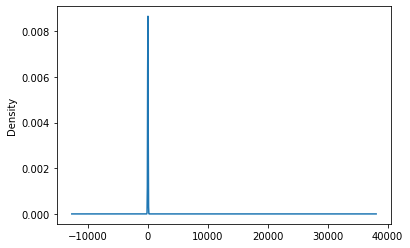

In [26]:
# Visualize the value counts of ASK_AMT
ask_df.plot.density()

In [27]:
# Determine which values to replace if counts are less than ...?
replace_ask_df = list(ask_df[ask_df < 100].index)

# Replace in dataframe
for amt in replace_ask_df:
    if amt <= 24999:
        application_df.ASK_AMT = application_df.ASK_AMT.replace(amt,str("5001-49999"))  
    elif amt < 99999:
        application_df.ASK_AMT = application_df.ASK_AMT.replace(amt,str("50000-99999"))
    elif amt < 499999:
        application_df.ASK_AMT = application_df.ASK_AMT.replace(amt,str("100000-499999"))
    elif amt < 999999:
        application_df.ASK_AMT = application_df.ASK_AMT.replace(amt,str("500000-999999"))        
    else:
        application_df.ASK_AMT = application_df.ASK_AMT.replace(amt,str("1M+"))
    
application_df.ASK_AMT = application_df.ASK_AMT.astype(str)

# Check to make sure binning was successful
application_df.ASK_AMT.value_counts()

5000             25398
50000-99999       2685
100000-499999     2305
5001-49999        1683
1M+               1577
500000-999999      651
Name: ASK_AMT, dtype: int64

In [28]:
# Generate our categorical variable lists
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()
application_cat

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS',
 'ASK_AMT']

In [29]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

C:\Users\nick\Anaconda3\envs\PythonData\envs\mlenv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,...,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y,ASK_AMT_100000-499999,ASK_AMT_1M+,ASK_AMT_5000,ASK_AMT_50000-99999,ASK_AMT_500000-999999,ASK_AMT_5001-49999
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [30]:
# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df, left_index=True,right_index=True)
application_df = application_df.drop(columns = application_cat)
application_df.head()

,STATUS,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,...,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y,ASK_AMT_100000-499999,ASK_AMT_1M+,ASK_AMT_5000,ASK_AMT_50000-99999,ASK_AMT_500000-999999,ASK_AMT_5001-49999
0,1,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [31]:
# Split our preprocessed data into our features and target arrays
y = application_df['IS_SUCCESSFUL'].values
X = application_df.drop(['IS_SUCCESSFUL'],1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [32]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [33]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
input_features = len(X_train_scaled[0])
nodes_layer1 = 80
nodes_layer2 = 30

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=nodes_layer1, activation="relu", input_dim=input_features))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 80)                3600      
                                                                 
 dense_4 (Dense)             (None, 30)                2430      
                                                                 
 dense_5 (Dense)             (None, 1)                 31        
                                                                 
Total params: 6,061
Trainable params: 6,061
Non-trainable params: 0
_________________________________________________________________


In [34]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [35]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq='epoch',
    period=5)
# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=100, callbacks=[cp_callback])

Epoch 1/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5803 - accuracy: 0.7138
Epoch 2/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5635 - accuracy: 0.7241
Epoch 3/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5614 - accuracy: 0.7271
Epoch 4/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5595 - accuracy: 0.7275
Epoch 5/100
795/804 [============================>.] - ETA: 0s - loss: 0.5581 - accuracy: 0.7272
Epoch 5: saving model to checkpoints\weights.05.hdf5
804/804 [==============================] - 1s 2ms/step - loss: 0.5583 - accuracy: 0.7271
Epoch 6/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5570 - accuracy: 0.7273
Epoch 7/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5566 - accuracy: 0.7280
Epoch 8/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5562 - accuracy: 0.7294
Epoch 9/100
804/804 [==============================] -

804/804 [==============================] - 2s 2ms/step - loss: 0.5453 - accuracy: 0.7326
Epoch 64/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5448 - accuracy: 0.7337
Epoch 65/100
792/804 [============================>.] - ETA: 0s - loss: 0.5446 - accuracy: 0.7337
Epoch 65: saving model to checkpoints\weights.65.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.5446 - accuracy: 0.7339
Epoch 66/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5447 - accuracy: 0.7337
Epoch 67/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5446 - accuracy: 0.7340
Epoch 68/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5444 - accuracy: 0.7341
Epoch 69/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5448 - accuracy: 0.7336
Epoch 70/100
779/804 [============================>.] - ETA: 0s - loss: 0.5441 - accuracy: 0.7341
Epoch 70: saving model to checkpoints\weights.70.hdf5
804/804 

In [36]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 0.5714 - accuracy: 0.7240 - 530ms/epoch - 2ms/step
Loss: 0.5714050531387329, Accuracy: 0.7239649891853333


# Test 2 - Add third hidden layer and additional neurons

In [37]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
input_features = len(X_train_scaled[0])
nodes_layer1 = 100
nodes_layer2 = 50
nodes_layer3 = 10

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=nodes_layer1, activation="relu", input_dim=input_features))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=nodes_layer2, activation="relu"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=nodes_layer3, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 100)               4500      
                                                                 
 dense_7 (Dense)             (None, 50)                5050      
                                                                 
 dense_8 (Dense)             (None, 10)                510       
                                                                 
 dense_9 (Dense)             (None, 1)                 11        
                                                                 
Total params: 10,071
Trainable params: 10,071
Non-trainable params: 0
_________________________________________________________________


In [38]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [39]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq='epoch',
    period=5)
# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=100, callbacks=[cp_callback])

Epoch 1/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5770 - accuracy: 0.7156
Epoch 2/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5623 - accuracy: 0.7255
Epoch 3/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5604 - accuracy: 0.7263
Epoch 4/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5583 - accuracy: 0.7269
Epoch 5/100
800/804 [============================>.] - ETA: 0s - loss: 0.5581 - accuracy: 0.7269
Epoch 5: saving model to checkpoints\weights.05.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.5577 - accuracy: 0.7272
Epoch 6/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5571 - accuracy: 0.7273
Epoch 7/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5561 - accuracy: 0.7288
Epoch 8/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5565 - accuracy: 0.7285
Epoch 9/100
804/804 [==============================] -

804/804 [==============================] - 2s 2ms/step - loss: 0.5436 - accuracy: 0.7344
Epoch 64/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5440 - accuracy: 0.7341
Epoch 65/100
788/804 [============================>.] - ETA: 0s - loss: 0.5436 - accuracy: 0.7352
Epoch 65: saving model to checkpoints\weights.65.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.5438 - accuracy: 0.7347
Epoch 66/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5439 - accuracy: 0.7345
Epoch 67/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5440 - accuracy: 0.7343
Epoch 68/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5436 - accuracy: 0.7344
Epoch 69/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5430 - accuracy: 0.7353
Epoch 70/100
796/804 [============================>.] - ETA: 0s - loss: 0.5428 - accuracy: 0.7349
Epoch 70: saving model to checkpoints\weights.70.hdf5
804/804 

In [40]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 0.5777 - accuracy: 0.7248 - 513ms/epoch - 2ms/step
Loss: 0.5776903033256531, Accuracy: 0.724781334400177


# Test 3 - Add more epochs and change in activation

In [41]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
input_features = len(X_train_scaled[0])
nodes_layer1 = 80
nodes_layer2 = 30
nodes_layer3 = 10

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=nodes_layer1, activation="relu", input_dim=input_features))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=nodes_layer2, activation="relu"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=nodes_layer3, activation="tanh"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 80)                3600      
                                                                 
 dense_11 (Dense)            (None, 30)                2430      
                                                                 
 dense_12 (Dense)            (None, 10)                310       
                                                                 
 dense_13 (Dense)            (None, 1)                 11        
                                                                 
Total params: 6,351
Trainable params: 6,351
Non-trainable params: 0
_________________________________________________________________


In [42]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [43]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq='epoch',
    period=5)
# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=200, callbacks=[cp_callback])

Epoch 1/200
804/804 [==============================] - 2s 2ms/step - loss: 0.5754 - accuracy: 0.7176
Epoch 2/200
804/804 [==============================] - 2s 2ms/step - loss: 0.5626 - accuracy: 0.7238
Epoch 3/200
804/804 [==============================] - 2s 2ms/step - loss: 0.5598 - accuracy: 0.7258
Epoch 4/200
804/804 [==============================] - 2s 2ms/step - loss: 0.5578 - accuracy: 0.7280
Epoch 5/200
787/804 [============================>.] - ETA: 0s - loss: 0.5569 - accuracy: 0.7290
Epoch 5: saving model to checkpoints\weights.05.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.5571 - accuracy: 0.7288
Epoch 6/200
804/804 [==============================] - 2s 2ms/step - loss: 0.5560 - accuracy: 0.7282
Epoch 7/200
804/804 [==============================] - 2s 2ms/step - loss: 0.5559 - accuracy: 0.7282
Epoch 8/200
804/804 [==============================] - 2s 2ms/step - loss: 0.5552 - accuracy: 0.7294
Epoch 9/200
804/804 [==============================] -

804/804 [==============================] - 2s 2ms/step - loss: 0.5440 - accuracy: 0.7338
Epoch 64/200
804/804 [==============================] - 2s 2ms/step - loss: 0.5443 - accuracy: 0.7331
Epoch 65/200
782/804 [============================>.] - ETA: 0s - loss: 0.5441 - accuracy: 0.7329
Epoch 65: saving model to checkpoints\weights.65.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.5438 - accuracy: 0.7333
Epoch 66/200
804/804 [==============================] - 2s 2ms/step - loss: 0.5443 - accuracy: 0.7344
Epoch 67/200
804/804 [==============================] - 2s 2ms/step - loss: 0.5446 - accuracy: 0.7339
Epoch 68/200
804/804 [==============================] - 2s 2ms/step - loss: 0.5445 - accuracy: 0.7346
Epoch 69/200
804/804 [==============================] - 2s 2ms/step - loss: 0.5437 - accuracy: 0.7337
Epoch 70/200
803/804 [============================>.] - ETA: 0s - loss: 0.5440 - accuracy: 0.7339
Epoch 70: saving model to checkpoints\weights.70.hdf5
804/804 

Epoch 126/200
804/804 [==============================] - 2s 2ms/step - loss: 0.5417 - accuracy: 0.7346
Epoch 127/200
804/804 [==============================] - 2s 2ms/step - loss: 0.5418 - accuracy: 0.7346
Epoch 128/200
804/804 [==============================] - 2s 2ms/step - loss: 0.5423 - accuracy: 0.7351
Epoch 129/200
804/804 [==============================] - 2s 2ms/step - loss: 0.5429 - accuracy: 0.7352
Epoch 130/200
791/804 [============================>.] - ETA: 0s - loss: 0.5429 - accuracy: 0.7333
Epoch 130: saving model to checkpoints\weights.130.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.5427 - accuracy: 0.7339
Epoch 131/200
804/804 [==============================] - 2s 2ms/step - loss: 0.5422 - accuracy: 0.7348
Epoch 132/200
804/804 [==============================] - 2s 2ms/step - loss: 0.5419 - accuracy: 0.7354
Epoch 133/200
804/804 [==============================] - 2s 2ms/step - loss: 0.5424 - accuracy: 0.7345
Epoch 134/200
804/804 [============

804/804 [==============================] - 2s 2ms/step - loss: 0.5417 - accuracy: 0.7348
Epoch 190/200
795/804 [============================>.] - ETA: 0s - loss: 0.5418 - accuracy: 0.7335
Epoch 190: saving model to checkpoints\weights.190.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.5416 - accuracy: 0.7336
Epoch 191/200
804/804 [==============================] - 2s 2ms/step - loss: 0.5417 - accuracy: 0.7346
Epoch 192/200
804/804 [==============================] - 2s 2ms/step - loss: 0.5413 - accuracy: 0.7355
Epoch 193/200
804/804 [==============================] - 2s 2ms/step - loss: 0.5417 - accuracy: 0.7349
Epoch 194/200
804/804 [==============================] - 2s 2ms/step - loss: 0.5427 - accuracy: 0.7336
Epoch 195/200
788/804 [============================>.] - ETA: 0s - loss: 0.5415 - accuracy: 0.7342
Epoch 195: saving model to checkpoints\weights.195.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.5411 - accuracy: 0.7345
Epoch 196/2

In [44]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 0.5763 - accuracy: 0.7243 - 527ms/epoch - 2ms/step
Loss: 0.576274037361145, Accuracy: 0.7243148684501648


In [45]:
# Export our model to HDF5 file
nn.save("AlphabetSoupCharity_Optimization.h5")